In [1]:
import pandas as pd
df = pd.DataFrame()

In [2]:
df = pd.read_csv('/Users/amirhan/Downloads/supermarket_sales - Sheet1.csv')
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/amirhan/Downloads/supermarket_sales - Sheet1.csv'

## Вопрос №1. В каком городе было больше всего продаж? 
Вопрос 2. Какой средний чек по городам?
Вопрос 3. Какое лучшее время продаж? 
Вопрос 4. Чем чаще всего платят?
Вопрос 5. Какой самый продоваемый товар ?
Вопрос 6. какой самый продоваемый product line?
Вопрос 7. Лучший месяц по продажам?


In [5]:
#Вычисляем сумму продаж в каждом городе
citys_ = df[['City', 'Total']].groupby('City').sum().reset_index()#['Total']
citys_

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


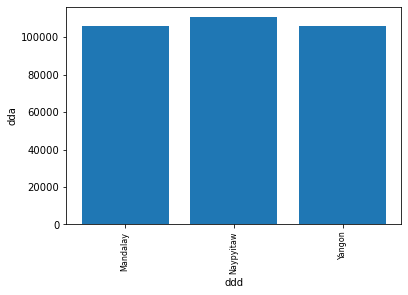

In [7]:
# построим график 
import matplotlib.pylab as plt

city_ = [city for city, a in df.groupby('City')]

plt.bar(city_, citys_['Total'])
plt.xticks(city_, rotation='vertical', size=8)
plt.ylabel('dda')
plt.xlabel('ddd')
plt.show()



### Вопрос 2. Какой средний чек по городам?

In [11]:
#Вычисляем средний чек продаж в каждом городе
citys_ = df[['City', 'Total']].groupby('City').mean()#['Total']
citys_

,Total
City,
Mandalay,319.872506
Naypyitaw,337.099715
Yangon,312.354031


### Вопрос 3. Лучший месяц по продажам?

In [16]:
# Создаем отдельную колонку для месяца. Вначале переведем Date в форматы даты
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month 

In [20]:
sum_by_month = df[['Month', 'Total']].groupby('Month').sum()
sum_by_month.head(12)

,Total
Month,
1,116291.868
2,97219.374
3,109455.507


### Вопрос 4. Какое лучшее время продаж? 

In [66]:
all_data1 = pd.DataFrame()
all_data1 = pd.read_csv('/Users/amirhan/Downloads/supermarket_sales - Sheet1.csv')

In [70]:
all_data1['Hour'] = all_data1['Time'].str[0:2] 

In [80]:
sum_hour = all_data1[['Hour','Total']].groupby('Hour').sum()
sum_hour.sort_values(by = 'Total', ascending=False)

,Total
Hour,
19,39699.5130
13,34723.2270
10,31421.4810
15,31179.5085
14,30828.3990
11,30377.3295
12,26065.8825
18,26030.3400
16,25226.3235


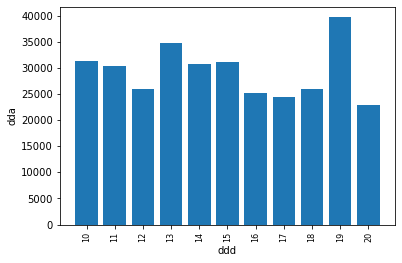

In [78]:
hour_ = [hour for hour, a in all_data1.groupby('Hour')]

plt.bar(hour_, sum_hour['Total'])
plt.xticks(hour_, rotation='vertical', size=8)
plt.ylabel('dda')
plt.xlabel('ddd')
plt.show()




### Чем чаще всего платят?

In [58]:
sum_pay = df[['Payment', 'Total']].groupby('Payment').sum()
sum_pay.head()

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


In [56]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,00:00:00,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,00:00:00,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,00:00:00,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,00:00:00,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,00:00:00,Ewallet,604.17,4.761905,30.2085,5.3,2


### Вопрос 5. Какой самый продоваемый товар ?

In [59]:
sum_pay = df[['Product line', 'Total']].groupby('Product line').sum()
sum_pay.head()

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130


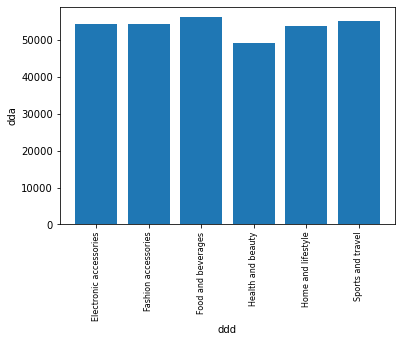

In [60]:
result = [product for product, df in df.groupby('Product line')]

plt.bar(result, sum_pay['Total'])
plt.xticks(result, rotation='vertical', size=8)
plt.ylabel('dda')
plt.xlabel('ddd')
plt.show()

### Кто чаще платит?

In [64]:
sum_sex = df[['Gender', 'Total']].groupby('Gender').sum()
sum_sex

,Total
Gender,
Female,167882.925
Male,155083.824


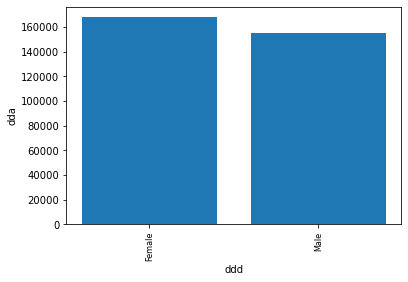

In [65]:
gender = [product for product, df in df.groupby('Gender')]

plt.bar(gender, sum_sex['Total'])
plt.xticks(gender, rotation='vertical', size=8)
plt.ylabel('dda')
plt.xlabel('ddd')
plt.show()

### В какое время чаще всего платят